# Goal of this project
- We are trying to classify handwritten images into one of 10 classes.
- This is a supervised classification problem.

# Performance Measure
- Our main performance measures are going to be precision, recall, f1_score and accuracy
- We will focus on accuracy for the multiclass classification problem, however for binary classification accuracy is not helpful, if we have a skewed dataset
- For example, if we are trying to classify an image as a 5 or not. A trivial way to get high accuracy is to always guess "not 5" if our dataset is mainly other digits. However the entire MNIST dataset is fairly balanced, therefore accuracy on the entire is set is a valid measure

In [3]:
from sklearn.datasets import fetch_openml
import warnings
warnings.filterwarnings('ignore')

In [4]:
# get dataset
mnist = fetch_openml("mnist_784", version=1)

In [5]:
# bunches are like dictionaries, you can get values by mnist[key]
print(type(mnist))
print(mnist.__dir__())

<class 'sklearn.utils._bunch.Bunch'>
dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [6]:
# this is the dataframe
# each row is 784 values between 0 and 255
# 0 = white, 255 = black
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# values to predict
mnist["target"]

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [8]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [9]:
import matplotlib.pyplot as plt
import numpy as np

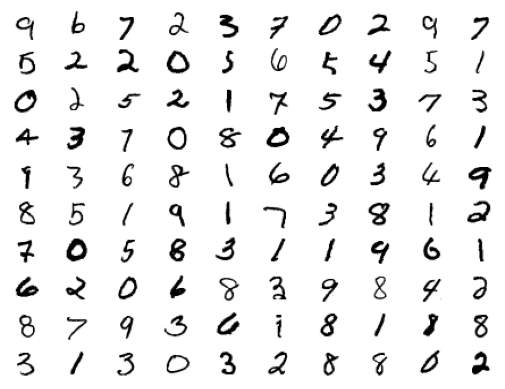

In [10]:
# lets have a look at some random images
fig, ax = plt.subplots(nrows=10, ncols=10)
for i in range(10):
    for j in range(10):
        image_vector = X.iloc[np.random.randint(0,70_000)].to_numpy().reshape((28,28))
        ax[i][j].imshow(image_vector, cmap="binary")
        ax[i][j].axis("off")

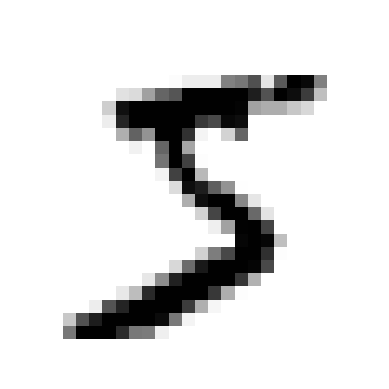

label = 5


In [11]:
# check an example image
example_digit_features = X.iloc[0].to_numpy()
example_digit_image = example_digit_features.reshape((28,28))
plt.imshow(example_digit_image, cmap="binary")
plt.axis("off")
plt.show()
print(f"label = {y[0]}")

In [12]:
# at the moment the labels are strings
# it is easier to work with target variables as ints rather than strings
# cast all strs -> np.uint8
# choose np.uint8 to save memory, as we dont need to store large numbers or negatives
y = y.astype(np.uint8)

In [13]:
# lets see how many of each digit we have
for i in range(10):
    count = sum(y == i)
    print(f"{i} = {count}")

0 = 6903
1 = 7877
2 = 6990
3 = 7141
4 = 6824
5 = 6313
6 = 6876
7 = 7293
8 = 6825
9 = 6958


In [14]:
# split data
# data in the mnist dataset is set up such that, first 60,000 examples are training
# last 10,000 examples are for testing, this can be seen in mnist["DESCR"]
X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


# Binary Classifier
- before classifying into 10 different categories lets first focus on a binary classifier
- This means given an image can we say it is or isnt a particular number e.g. 5 or not

In [15]:
# each entry is True if it is a 5, False otherwise
y_train_is_5 = (y_train == 5)
y_test_is_5 = (y_test == 5)
print(f"there are {sum(y_test_is_5)} 5's in this testing set")

there are 892 5's in this testing set


In [16]:
# import binary classifiers
from sklearn.linear_model import SGDClassifier

- create an SGDClassifier oject and train it on the training data, so given a feature vector it outputs either True or False, if it thinks this is a 5 or not

In [17]:
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_is_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [18]:
# test classifier on our example digit from earlier
sgd_classifier.predict([example_digit_features])

array([ True])

- Lets now measure the performance of this classifier using cross validation

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
cross_val_score(sgd_classifier, X_train, y_train_is_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

### Understanding cross-validation
- So the above code takes the training data and splits it into 3 parts
- The model is trained on 2 parts and then tested on the 3rd
- This way we can see how the model will perform on unseen data (the 3rd part)
- This process is then repeated 3 times (as cv=3) and each accuracy score is calculated

- we see that this model is seemingly very accurate with about 95% accuracy, however this is misleading
- We saw earlier that 892 / 10,000 of the test examples are a 5 and therefore if we guessed not 5 to every image, we would get around 91% accuracy, therefore accuracy is not a helpful performance measure here and we should consider different performance metrics

- A better performance measure is to look at the **confusion matrix**
- This counts the number of times instances of class A are classified as class B
- e.g. how many times a 3 is mistaken for a 4, to check this we would look at the (3,4) entry in the matrix

In [21]:
from sklearn.model_selection import cross_val_predict

- cross_val_predict gives us the actual predictions made during cross validation
- So each time the model gets trained, the predictions are added to y_train_pred
- By the end of cross validation, all predictions have been made

In [22]:
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_is_5, cv=3)

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
conf_matrix = confusion_matrix(y_train_is_5, y_train_pred)
conf_matrix

array([[53892,   687],
       [ 1891,  3530]])

- Each row in this matrix is an actual class, in this case actual 5
- Each column is a predicted class
- So in this matrix, the first row is non-5 images. Of those, 53892 were correctly identified as non-5 however our model predicted 687 were 5s, which is incorrect.
- The second row is actual 5 images. Of those, 1891 were predicted to not be a five and 3530 were correct predictions, predicted to be a five and was an actual five.

- this is what a perfect classifier looks like. 0's on the off diagonal as 0 incorrect predictions


In [25]:
confusion_matrix(y_train_is_5, y_train_is_5)

array([[54579,     0],
       [    0,  5421]])

- Some metrics we can now look at with the confusion matrix are **precision** and **recall**
- precision: out of all positive predictions, how many were correct
- e.g. if precision = 75%, this means if our model predicted a 5 4 times, it actually was a 5 3 times
- recall: out of all actual positive samples, how many were correctly predicted
- e.g. if recall = 75%, this means if there are 4 actual 5's our model detects 3 of them
- $precision = \frac{TP}{TP + FP}$
- $recall = \frac{TP}{TP + FN}$
- Intuition: suppose we have a metal detector at an airport to detect dangerous items
- precision: how often are the alarms right? If the metal detector beeps, how likely is it that there is a dangerous item
- recall: how many dangerous items does it catch? of all dangerous items which went through the scanner, how many did it actually catch?
- In this case, we would prefer to have a high recall than high precision, as high recall means we are catching more dangerous weapons, even if some are false alarms

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [27]:
# check scores
print(precision_score(y_train_is_5, y_train_pred))
print(recall_score(y_train_is_5, y_train_pred))
print(f1_score(y_train_is_5, y_train_pred))

0.8370879772350012
0.6511713705958311
0.7325171197343847


In [28]:
def get_scores(TN, FP, FN, TP):
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1 = TP / (TP + (FN + FP) / 2)
    return (precision, recall, F1)

In [29]:
TN, FP, FN, TP = conf_matrix.ravel()
precision, recall, F1 = get_scores(TN, FP, FN, TP)
print(precision, recall, F1)

0.8370879772350012 0.6511713705958311 0.7325171197343847


- These numbers are telling us, when our model thinks an image is a 5, it actually is a 5 83.7% of the time. Our model correctly identifies 65% of actual 5's
- F1 score combines precision and recall into one metric
- F1 score is called a harmonic mean, which means lower values drag down the value alot more than higher values bring it up. Therefore to have a high F1 score both precision and recall must be high
- $F1 = \frac{TP}{TP + \frac{FN + FP}{2}}$

# Precision vs Recall Trade-off
- The SGDClassifier makes classification decisions by comparing a score determined by the decision_function() to a threshold.
- If the score > threshold, it assigns the new instance a positive class, otherwise it is a negative class
- Raising the threshold increases precision and decreases recall
- Decreasing the threshold increases recall and decreases precision
- This is because with a lower threshold, more images are classed as a 5 and therefore the model "detects" more of them, so recall increases. However, its precision will decrease because as the threshold is lower, more and more non 5 images are classed as a 5 and therefore precision decreases

In [30]:
decision_scores = sgd_classifier.decision_function([example_digit_features])
print(decision_scores)
threshold = 0
prediction = (decision_scores > threshold)
print(prediction)

[2164.22030239]
[ True]


- So for the example 5 digit from earlier, the sgd_classifier model assigns it a decision score of 2164. This is then compared to a threshold (in this case 0) to determine the class

In [31]:
threshold = 8000
prediction = (decision_scores > threshold)
print(prediction)

[False]


- Note if we increase the threshold, then the recall decreases. Our model no longer detects this image as a 5

- So what threshold value should we choose?
- Intuitively, we want to choose a threshold where all of our actual 5's are above it and everything else is below it
- Lets first get the decision scores for all of our training examples

In [32]:
decision_scores = cross_val_predict(sgd_classifier, X_train, y_train_is_5, cv=3,
                                   method="decision_function")
# this is basically one step before assigning classes
# we assign classes based on these decision scores

In [33]:
decision_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

- Once we have our decision scores, we can use precision_recall_curve to plot precision and recall for all possible threshold values
- We want to choose the threshold which maximises both precision and recall

In [34]:
from sklearn.metrics import precision_recall_curve

In [35]:
precisions, recalls, thresholds = precision_recall_curve(y_train_is_5, decision_scores)

In [36]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlim(left=-50_000, right=50_000)
    plt.legend(loc="center right")
    plt.xlabel("Threshold")
    plt.grid("on")

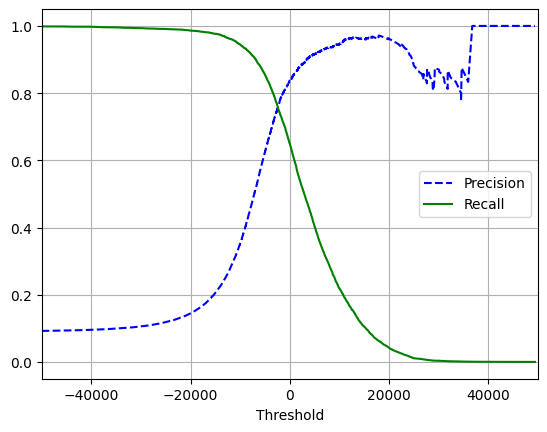

In [37]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

- From this we an see as we increase threshold, precision increases but recall decreases
- For example, if we choose our threshold to be 20,000 our precision will be about 0.95 and recall = 0.05

In [38]:
def plot_recall_vs_precision(recalls, precisions):
    plt.plot(recalls, precisions)
    plt.grid("on")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.xlim(left=0, right=1)
    plt.ylim(bottom=0, top=1)

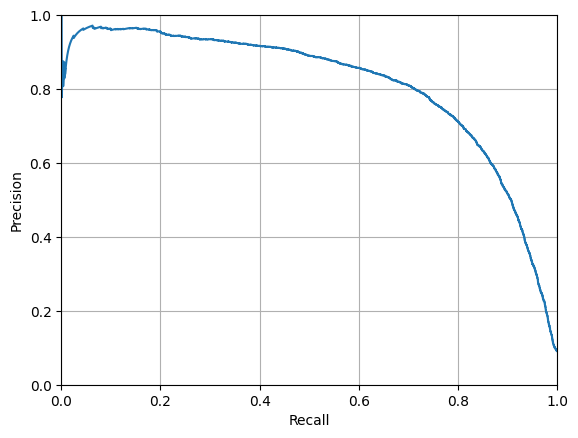

In [39]:
plot_recall_vs_precision(recalls, precisions)

- We can see that at around 80% recall, precision starts to drop off quickly
- Choosing a value like 60% recall leads to precision = 85% seems pretty good
- We can choose our values depending on whether we want to focus on precision or recall for our project

In [40]:
# suppose we want the threshold value which gives us 90% precision

# get the value which gives us 90% precision
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

# compare decision function scores to threshold to determine class
y_train_pred_90 = (decision_scores >= threshold_90_precision)

In [41]:
precision_score(y_train_is_5, y_train_pred_90)

0.9000345901072293

In [42]:
recall_score(y_train_is_5, y_train_pred_90)

0.4799852425751706

- So with this threshold value, if our classifier thinks a digit is a 5, it is correct 90% of the time
- Our classifier correctly predicts 48% of 5's
- 90% precision is good but our low recall means our model is not detecting over half of the fives, i.e. our model is very cautious to say "this digit is a 5"

# ROC Curve

- receiver operating characteristic (ROC) curve plots true positive rate against false positive rate
- FPR is the ratio of negative instances that are incorrectly classified as positive
- FPR = 1 - true negative rate (TNR), which is the ratio of negative instances that are correctly classified as negative
- TNR is also called specificity, hence ROC curve plots sensitivity (recall) vs 1 - specificity

In [43]:
from sklearn.metrics import roc_curve

In [44]:
fpr, tpr, thresholds = roc_curve(y_train_is_5, decision_scores)

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.grid("on")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate (Recall)")
    plt.xlim(left=0, right=1)
    plt.ylim(bottom=0, top=1)
    if label:
        plt.legend(loc="center right")

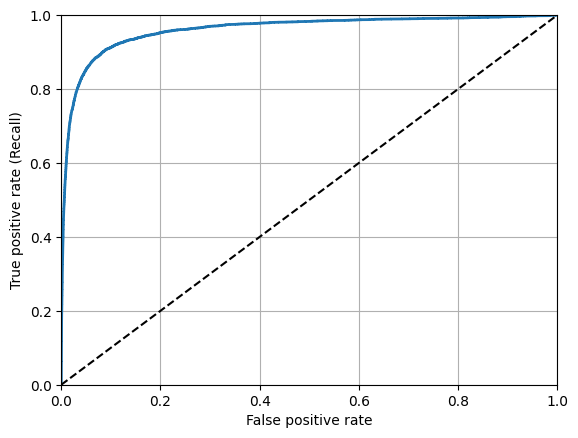

In [46]:
plot_roc_curve(fpr, tpr)

- The dashed line shows a purely random classifier
- A good classifier stays as far away from this dashed line as posible (top left corner)
- We can see, the higher the recall, the higher the false positive rate

- A way we can compare classifiers is the area under the curve (AUC). A perfect classifier has an ROC AUC of 1, whereas a purely random classifier has an ROC AUC of 0.5

In [47]:
from sklearn.metrics import roc_auc_score

In [48]:
roc_auc_score(y_train_is_5, decision_scores)

0.9604938554008616

- Lets train another model and compare it to SGDClassifier via ROC and ROC AUC scores
- RandomForestClassifier does not have a decision_function() and instead has predict_proba() which is the probability this instance belongs to each class

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf_classifier = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(rf_classifier, X_train, y_train_is_5, cv=3,
                  method="predict_proba")

- The above code uses cross validation and outputs probabilities that each instance belongs to a class

In [51]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]], shape=(60000, 2))

- So for the first instance, there is an 11% chance its not a 5 and 89% chance it is a 5 and so on
- ROC curve() function expects scores but we can pass in probabilities

In [52]:
y_scores_forest = y_probas_forest[:, -1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_is_5, y_scores_forest)

Text(0, 0.5, 'True Positive Rate (Recall)')

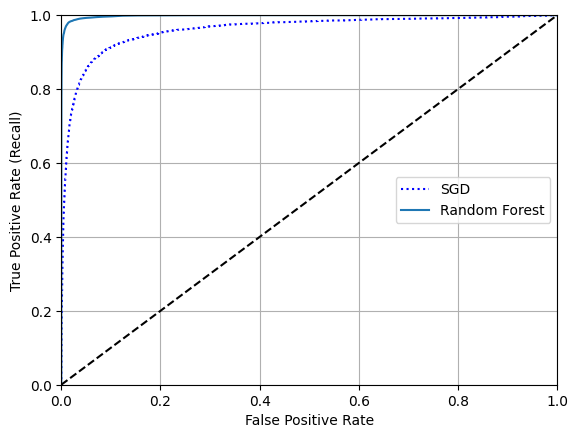

In [53]:
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, label="Random Forest")
plt.grid("on")
plt.xlim(left=0, right=1)
plt.ylim(bottom=0, top=1)
plt.plot([0, 1], [0,1], "k--")
plt.legend(loc="center right")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")

- The random forest has performed way better than SGD as it is much more to the top left corner than the SGD's roc curve
- The AUC (area under curve) of the random forest is also larger than SGD's

In [54]:
roc_auc_score(y_train_is_5, y_scores_forest)

0.9983436731328145

In [55]:
# use cross validation to make predictions
y_train_pred_forest = cross_val_predict(rf_classifier, X_train, y_train_is_5, cv=3)

In [56]:
y_train_pred_forest

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [57]:
precision_score(y_train_is_5, y_train_pred_forest)

0.9905083315756169

In [58]:
recall_score(y_train_is_5, y_train_pred_forest)

0.8662608374838591

# Multiclass Classification

- Lets train a support vector machine classifier on the training data
- its prediction is made by the largest decision_score it outputs

In [59]:
from sklearn.svm import SVC

In [60]:
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_classifier.predict([example_digit_features])

array([5], dtype=uint8)

- We can access the decision scores the SVC outputs, we can see that the class the model ends up predicting is the one with the largest decision_score i.e. 9.3132482

In [61]:
svm_example_decision_scores = svm_classifier.decision_function([example_digit_features])
svm_example_decision_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

 - This corresponds to predicting a 5 class

In [62]:
np.argmax(svm_example_decision_scores)

np.int64(5)

# Training Models
- We can now try several classification models on the dataset and compare performance measures to ultimately choose our final model, which we can then optimize by tweaking hyperparameters

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [64]:
models = {"SVC" : SVC(),
          "Random Forest Classifier" : RandomForestClassifier(),
          "K Neighbors Classifier" : KNeighborsClassifier(), 
         }

In [65]:
for key in models:
    model = models[key]

    # train model via cross validation
    cross_val_predictions = cross_val_predict(model, X_train, y_train, cv=3, method="predict")

    # get performance metrics of model
    precision = precision_score(y_train, cross_val_predictions, average="macro")
    recall = recall_score(y_train, cross_val_predictions, average="macro")
    f1 = f1_score(y_train, cross_val_predictions, average="macro")
    accuracy = accuracy_score(y_train, cross_val_predictions)

    print(f"{key} accuracy = {accuracy}")
    print(f"{key} precision = {precision}")
    print(f"{key} recall = {recall}")
    print(f"{key} f1 = {f1}")
    print("-------------------------------")

SVC accuracy = 0.9749
SVC precision = 0.9747099499157873
SVC recall = 0.9747208166258133
SVC f1 = 0.974703829501878
-------------------------------
Random Forest Classifier accuracy = 0.9652333333333334
Random Forest Classifier precision = 0.9649574517220871
Random Forest Classifier recall = 0.9649418951375915
Random Forest Classifier f1 = 0.9649343926196019
-------------------------------
K Neighbors Classifier accuracy = 0.9674166666666667
K Neighbors Classifier precision = 0.967895609653832
K Neighbors Classifier recall = 0.9669341316176434
K Neighbors Classifier f1 = 0.9672164755274893
-------------------------------


# Fine Tuning Model
- I am going to go foward with the K Neighbors classifier as it scores highly overall and is faster to train than a SVC
- We can use a grid search to find optimal hyperparameters

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid = [
    {"n_neighbors" : [2, 4, 8, 16, 32], "weights" : ["uniform", "distance"]},
]
k_nearest_classifier = KNeighborsClassifier()
grid_search = GridSearchCV(k_nearest_classifier, param_grid, cv=3,
                          scoring="accuracy",
                          return_train_score=True)
grid_search.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"[{'n_neighbors': [2, 4, ...], 'weights': ['uniform', 'distance']}]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_neighbors,4


In [68]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

- The model has found, of the hyperparameter combinations it tried, that n_neighbors = 4 and weights="distance" provide the best results
- We can view the accuracies of the model with each combination of parameters below

In [69]:
grid_search.cv_results_["mean_test_score"]

array([0.96055   , 0.96755   , 0.96663333, 0.97035   , 0.96435   ,
       0.96726667, 0.95923333, 0.96138333, 0.95035   , 0.95195   ])

- The highest accuracy here corresponds to the model with best_params_ and is shown below

In [75]:
best_cross_val_train_accuracy = grid_search.best_score_
best_cross_val_train_accuracy

np.float64(0.9703500000000002)

# Testing model
- Now that we have found our best performing model and have tweaked hyperparameters to squeeze out as much performance as we can, we now need to test it on the testing data

In [76]:
final_model = grid_search.best_estimator_
test_predictions = final_model.predict(X_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"test data accuracy = {accuracy}")

test data accuracy = 0.9714


## Extra Insights
- We can gain some extra insight into how our model performed by looking at the confusion matrix

In [72]:
conf_matrix = confusion_matrix(y_test, test_predictions)
conf_matrix

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [  10,    5,  995,    2,    1,    0,    0,   16,    3,    0],
       [   0,    1,    3,  974,    1,   14,    1,    7,    4,    5],
       [   1,    5,    0,    0,  950,    0,    4,    3,    0,   19],
       [   4,    0,    0,    9,    2,  862,    7,    1,    3,    4],
       [   4,    2,    0,    0,    3,    3,  946,    0,    0,    0],
       [   0,   17,    4,    0,    3,    0,    0,  994,    0,   10],
       [   5,    2,    4,   14,    5,   11,    4,    4,  920,    5],
       [   3,    4,    2,    7,    9,    4,    1,   10,    1,  968]])

- This confusion matrix shows us that most of our models predictions were indeed correct, as largest numbers are along the main diagonal
- The largest number not on a diagonal is the 19 at index (4,9). This means our model predicted a 9 when it was a 4 19 times.
- To improve this, we could maybe get more data for "4" images

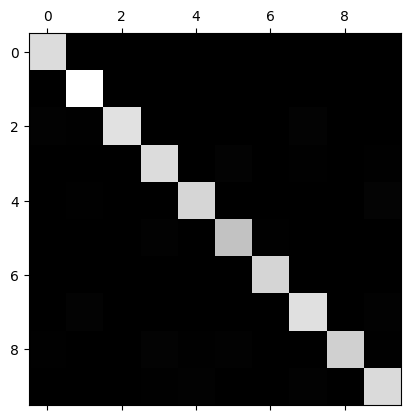

In [73]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show()

- The lighter the square, the better the model did at predicting that digit
- e.g the model was very good at predicting 1's
- From this, the 5 square looks the darkest, which means it incorrectly predicted this digit the most

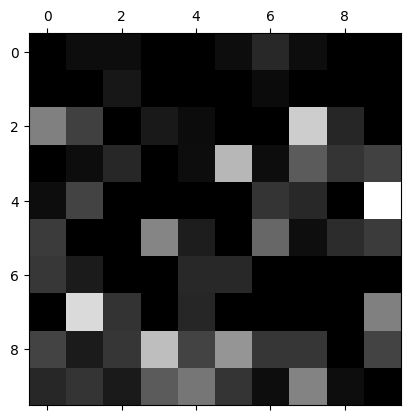

In [74]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums
np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show()

- This matrix shows us which digits were mis-predicted most often (most white cells)
- Our most white cells are at (4,9) and (7,1) which shows again that when the digit was a 4, our model predicted a 9 somewhat often and when the digit was a 7 it predicts a 1.

# Conclusion
- Our finalised KNeighborsClassifier achieves a **97.14% accuracy** on the testing data